In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

arquivos = ['geoGoldBHexp1_erro.csv', 'geoGoldBHexp2_erro.csv', 'geoGoldBHexp3_erro.csv', 'geoGoldBHexp4_erro.csv', 'geoGoldBHexp5_erro.csv', 'geoGoldBHexp6_erro.csv', 'geoGoldBHexp7_erro.csv', 'geoGoldBHexp8_erro.csv', 'geoGoldBHexp9_erro.csv', 'geoGoldBHexp10_erro.csv']

# Dicionário de associação entre nome do arquivo e número do experimento
experimentos = {
    'geoGoldBHexp1_erro.csv': '1',
    'geoGoldBHexp2_erro.csv': '1b',
    'geoGoldBHexp3_erro.csv': '2',
    'geoGoldBHexp4_erro.csv': '2b',
    'geoGoldBHexp5_erro.csv': '3',
    'geoGoldBHexp6_erro.csv': '3b',
    'geoGoldBHexp7_erro.csv': '4',
    'geoGoldBHexp8_erro.csv': '4b',
    'geoGoldBHexp9_erro.csv': '5',
    'geoGoldBHexp10_erro.csv': '5b'
}


In [3]:
for arquivo in arquivos:
    aux = pd.read_csv(f'..\csv\{arquivo}')
    experimento_nome = experimentos[arquivo]
    aux['experimento'] = experimento_nome  
    df = pd.concat([df, aux], ignore_index=True) 

df.head()
df.to_csv('..\csv\geoGoldBHexpTotal.csv', index=False)

### Plotagem dos gráficos

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Lendo o dataframe
df = pd.read_csv('..\csv\geoGoldBHexpTotal.csv')
df = df[df['geoapi_id'] != 'Here']

In [16]:
# Configurações do Seaborn

sns.set(font_scale=2)

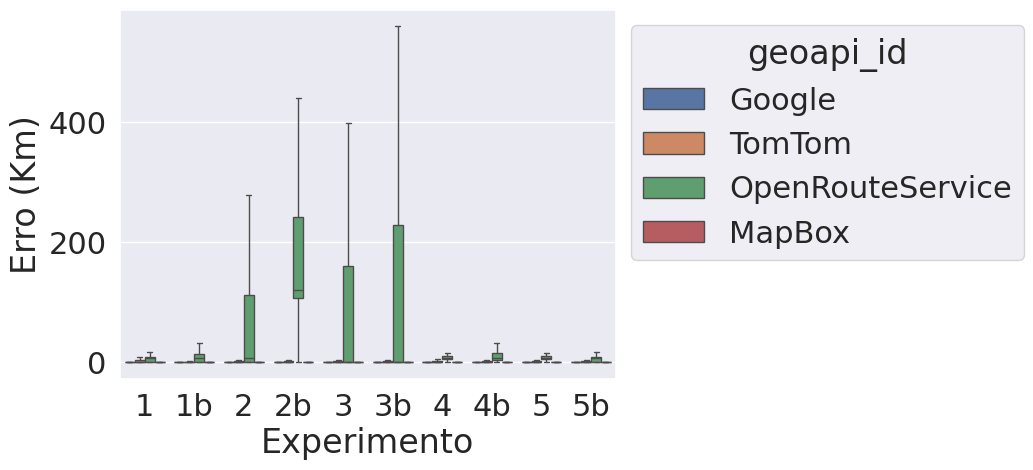

In [28]:
#sns.set(rc={"figure.figsize":(25, 15)})
ax = sns.boxplot(data=df, x='experimento', y='erro', hue='geoapi_id',
             showfliers=False
             )
ax.set(xlabel='Experimento', ylabel='Erro (Km)')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [18]:
df1 = df[(df['geoapi_id'] != 'OpenRouteService') & (df['geoapi_id'] != 'Here')]

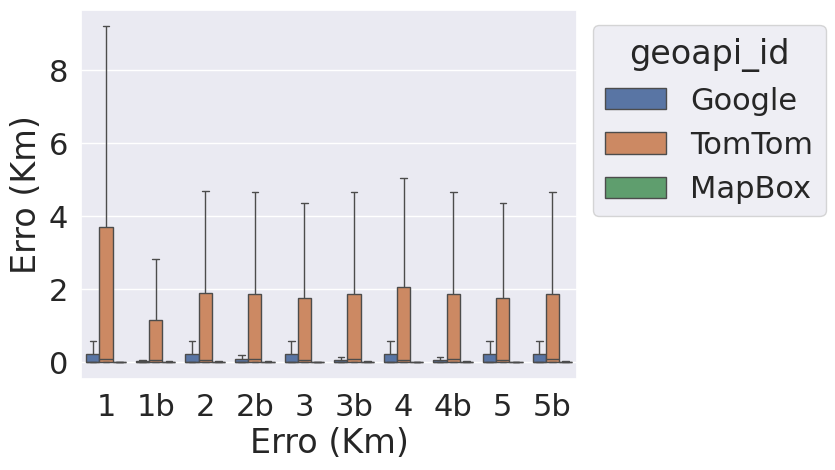

In [25]:
ax = sns.boxplot(data=df1, x='experimento', y='erro', hue='geoapi_id', 
                 showfliers=False
                 )
ax.set(xlabel='Erro (Km)', ylabel='Erro (Km)')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

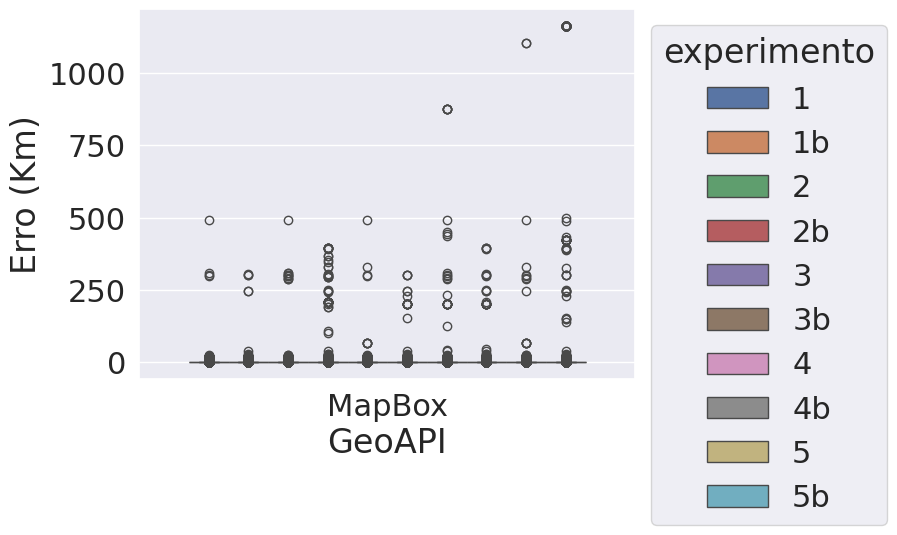

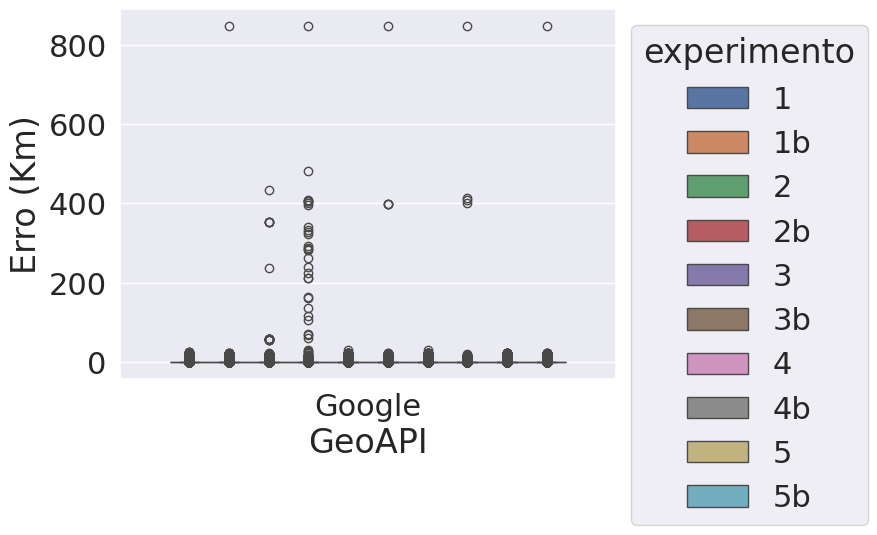

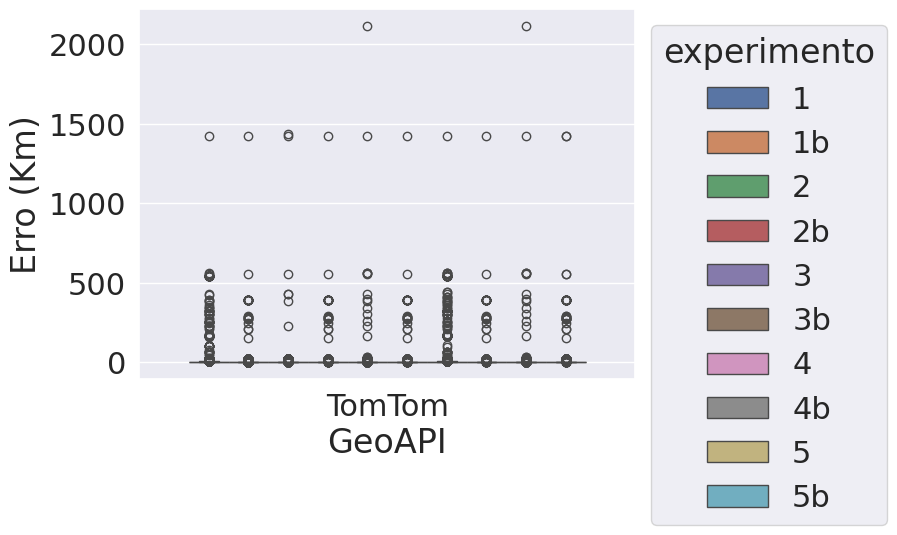

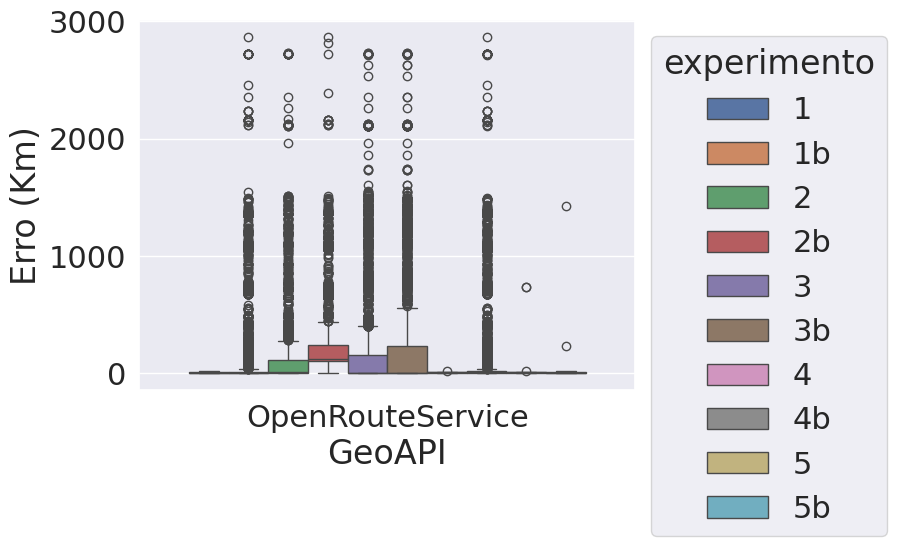

In [26]:
apis = ['MapBox','Google', 'TomTom', 'OpenRouteService']

for api in apis:
    aux = df[df['geoapi_id'] == api]
    ax =sns.boxplot(data=aux, hue='experimento', y='erro', x='geoapi_id',
                 #showfliers=False
                )
    ax.set(xlabel='GeoAPI', ylabel='Erro (Km)')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    